In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_excel('/content/drive/MyDrive/Time Series Studies/temperatura.xls')

In [3]:
temp['Ano'] = temp['Ano'].ffill()
temp['Ano'] = temp['Ano'].astype(int)
temp['mes'] = temp.groupby('Ano').cumcount() + 1
temp['data'] = temp['Ano'].astype(str) + "-" + temp['mes'].astype(str) + "-1"

In [4]:
temp['data'] = pd.to_datetime(temp['data'])

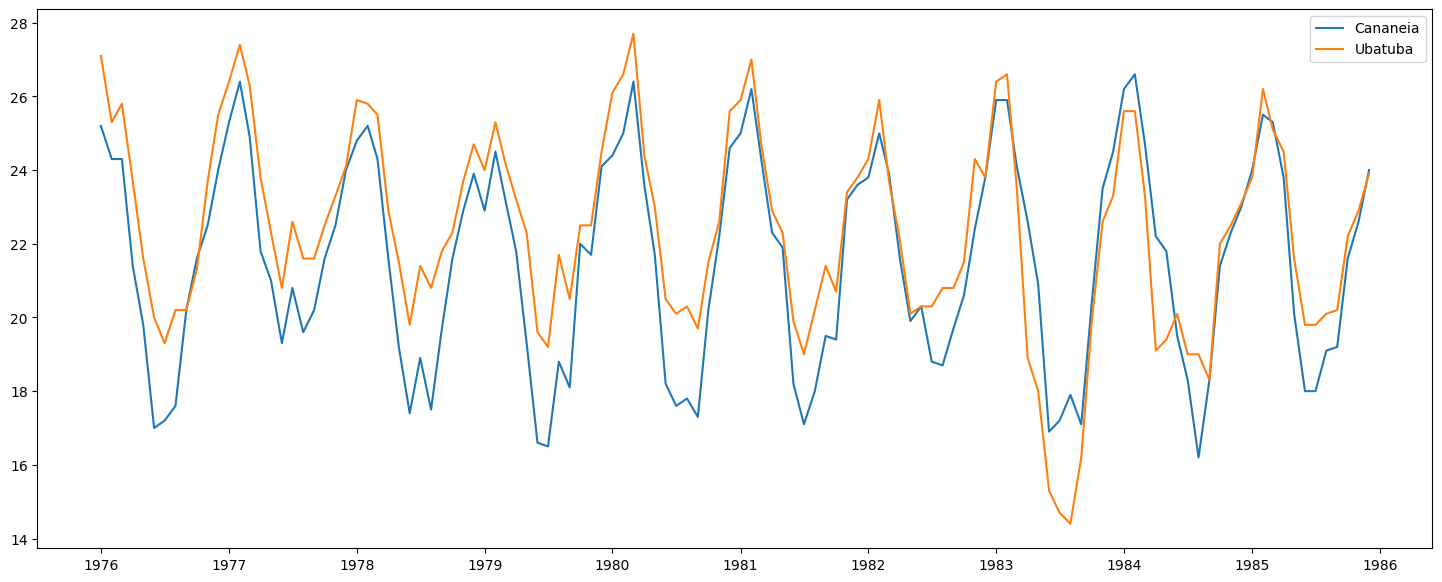

In [5]:
plt.figure(figsize = (18,7))

plt.plot('data', 'Cananeia', label = 'Cananeia', data = temp)
plt.plot('data', 'Ubatuba', label = 'Ubatuba', data = temp)

plt.legend()

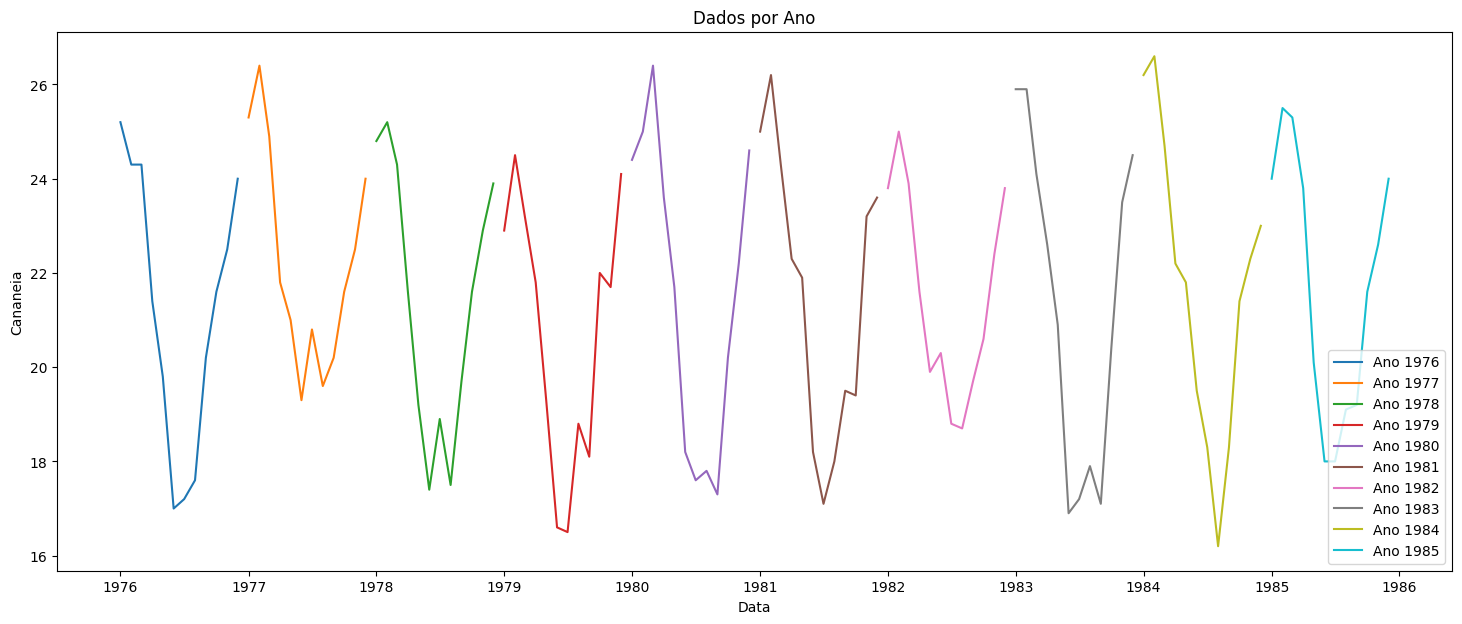

In [6]:
fig, ax = plt.subplots(figsize = (18,7))  # Cria uma única figura e eixo

for ano in temp['Ano'].unique():
    dados_ano = temp[temp['Ano'] == ano]
    ax.plot(dados_ano['data'], dados_ano['Cananeia'], label=f"Ano {ano}")

# Adiciona título, rótulos e legenda
ax.set_title("Dados por Ano")
ax.set_xlabel("Data")
ax.set_ylabel("Cananeia")
ax.legend(loc = 'lower right')  # Mostra a legenda para identificar os anos

plt.show()

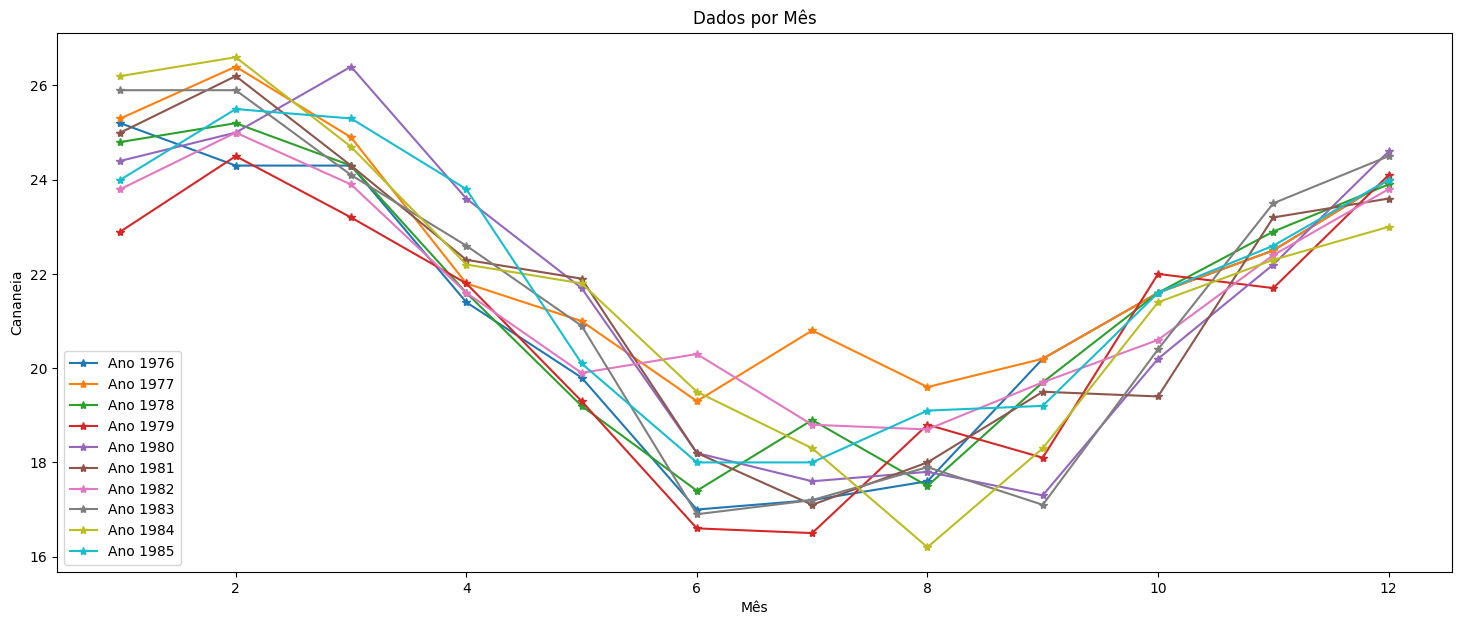

In [7]:
fig, ax = plt.subplots(figsize = (18,7))  # Cria uma única figura e eixo

for ano in temp['Ano'].unique():
    dados_ano = temp[temp['Ano'] == ano]
    ax.plot(dados_ano['mes'], dados_ano['Cananeia'], marker = '*', label=f"Ano {ano}")

# Adiciona título, rótulos e legenda
ax.set_title("Dados por Mês")
ax.set_xlabel("Mês")
ax.set_ylabel("Cananeia")
ax.legend(loc = 'lower left')

plt.show()

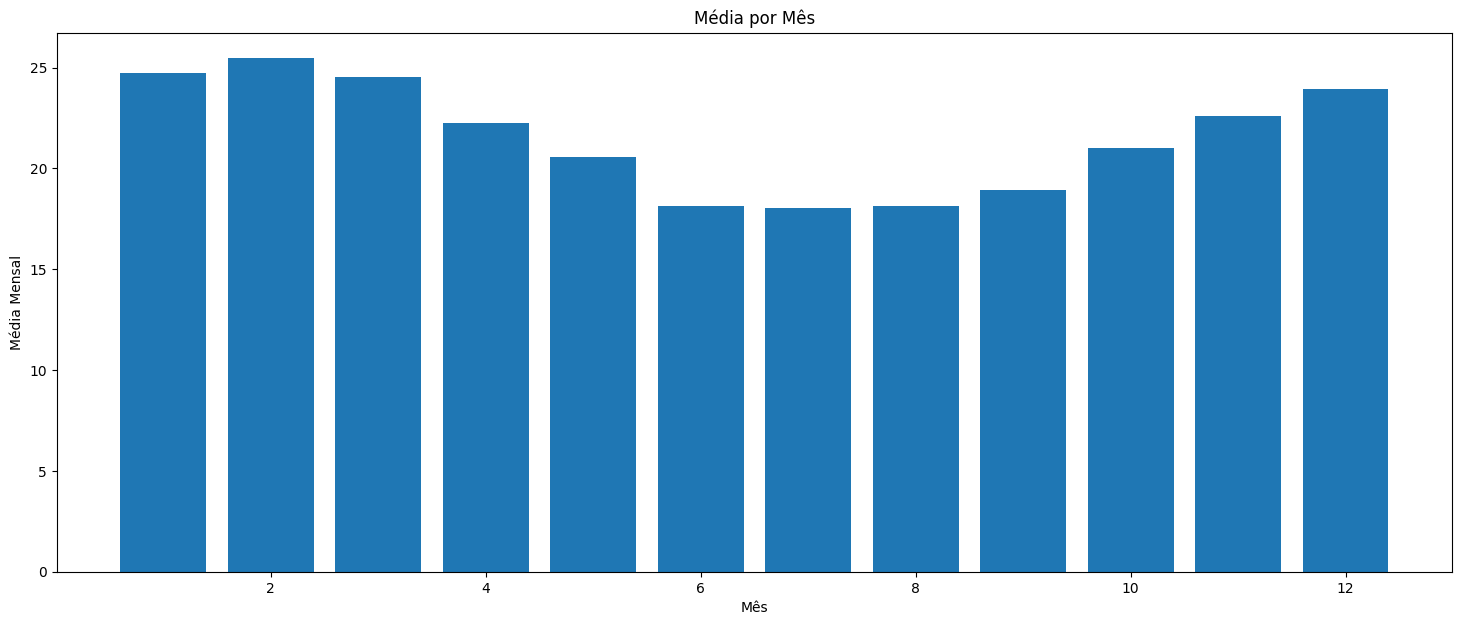

In [8]:
media_mensal = temp.groupby('mes')['Cananeia'].mean()

plt.figure(figsize = (18,7))

plt.bar(media_mensal.index, media_mensal)
plt.title('Média por Mês')
plt.xlabel('Mês')
plt.ylabel('Média Mensal')
plt.show()